### Part 1. Data Loading & Visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

path_train = os.path.join("csvs","train.csv")
path_test = os.path.join("csvs","test.csv")

In [2]:
data = np.loadtxt(path_train,skiprows=1, delimiter=",")
print(f"- The dataset shape is equal to {data.shape}")
X,y = data[:,1:]/255, data[:,0].astype("int64")

- The dataset shape is equal to (42000, 785)


In [3]:
# Checking the unique digits
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
indices = []
for digit in np.unique(y):
    indices.append(np.where(y == digit)[0])

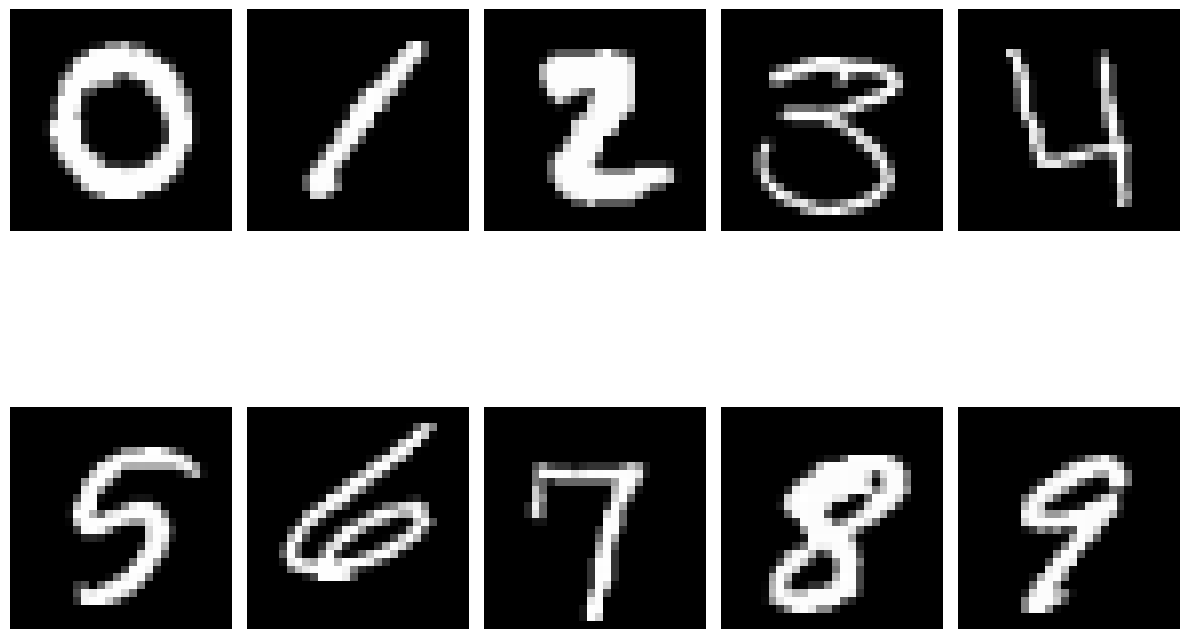

In [5]:
# Visualizing some samples
fig, ax = plt.subplots(figsize = (12,10), nrows = 2, ncols =5)
for i,idx in enumerate(indices):
    r,c = divmod(i,5)
    img = X[idx,:]
    img.resize((28,28))
    ax[r,c].imshow(img, cmap = "gray")
    ax[r,c].axis("off")
plt.tight_layout()
plt.show()

### Part 2. Deep Learning models

Preparing the training, validation and test sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,y, test_size = 0.3, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_val, y_val, test_size = 0.5, random_state=42
)

In [7]:
print(f"Training size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

Training size: 29400, Validation size: 6300, Test size: 6300


#### 2.1. A Simple MLP

In [8]:
from models import mlp_dataset, MLP
from training import training_loop, test_loop

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 64
LR = 1e-5
PATIENCE = 20
loss_fn = nn.CrossEntropyLoss().to(device)
EPOCHS = 300

train_dloader = DataLoader(mlp_dataset(X_train,y_train),
                           batch_size=BATCH_SIZE, shuffle=True)
test_dloader = DataLoader(mlp_dataset(X_test,y_test),batch_size=BATCH_SIZE)
val_dloader = DataLoader(mlp_dataset(X_val, y_val), batch_size=BATCH_SIZE)

In [10]:
model = MLP().to(device)

Epoch: 10/300     Training Loss: 0.2877     Validation Loss: 0.2247
Epoch: 20/300     Training Loss: 0.1736     Validation Loss: 0.1369
Epoch: 30/300     Training Loss: 0.1223     Validation Loss: 0.1051
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
Epoch: 40/300     Training Loss: 0.0919     Validation Loss: 0.0888
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
Epoch: 50/300     Training Loss: 0.0730     Validation Loss: 0.0803
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
Epoch: 60/300     Training Loss: 0.0586     Validation Loss: 0.0773
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
Epoch: 70/300     Training Loss:

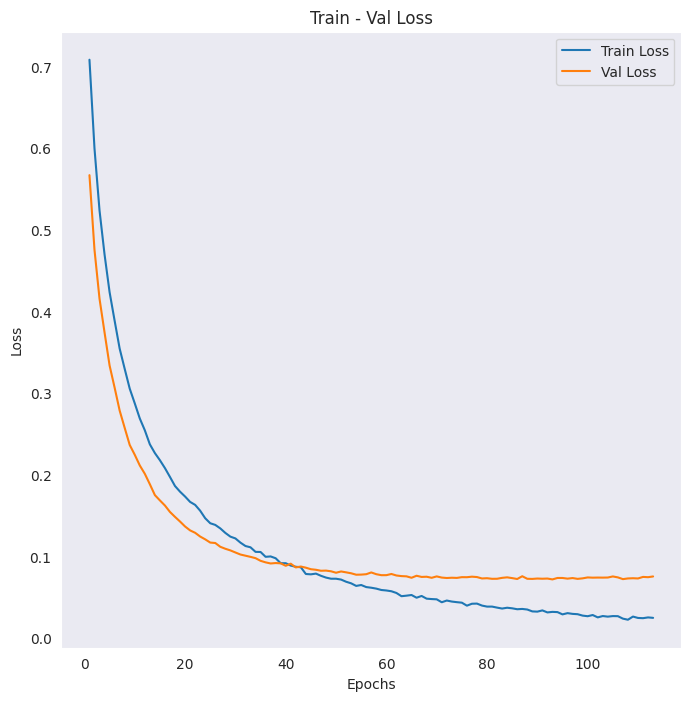

In [12]:
training_loop(model, train_dloader, val_dloader, epochs=EPOCHS, lr = LR,
              loss_fn=loss_fn, regularization="L2", reg_lambda=1e-6, mod_epochs=10,
              early_stopping=True, verbose=False, patience=PATIENCE, title = "MLP training")

In [13]:
from sklearn.metrics import classification_report

preds, targets = test_loop(model,test_dloader,device)

print(classification_report(targets, preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       604
           1       0.99      0.99      0.99       690
           2       0.97      0.98      0.98       644
           3       0.97      0.97      0.97       675
           4       0.98      0.98      0.98       653
           5       0.98      0.98      0.98       510
           6       0.99      0.98      0.99       625
           7       0.98      0.97      0.98       664
           8       0.97      0.97      0.97       618
           9       0.97      0.98      0.97       617

    accuracy                           0.98      6300
   macro avg       0.98      0.98      0.98      6300
weighted avg       0.98      0.98      0.98      6300

